# Exercise Set 12: Peer effects 


In this Exercise Set 12 we will investigate peer effects data. 

## 12.1: roommate peer effects


<br>
<br>

We use a simlated dataset which will give results that provide conclusions similar to Sacerdote (2000). 

### Data structuring 

Our data set does not contain a network but has an implicit one associated. We assume there is an edge between all room mates. 

> **Ex. 12.1.1:** Create a column called `person_other` with identity of the other person in room.
>> *Hint:* You can get the unique people in the room by using `df.groupby('room').person.unique()`.

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

In [47]:
data = pd.read_csv("peer_effects_room.csv") 
data.head()

,person,room,high_school_GPA,college_GPA
0,0,351,-1.715472,-1.285307
1,1,738,-0.530190,-0.031833
2,2,247,-0.589543,-0.203230
3,3,751,-1.303115,0.982488
4,4,698,0.156678,-0.371632


In [48]:
df = data.merge(data[['person','room']], on = 'room')
df = df[df['person_x'] != df['person_y']] # keep only observations where person_x and person_y values are ne
df.head()

,person_x,room,high_school_GPA,college_GPA,person_y
1,0,351,-1.715472,-1.285307,1645
2,1645,351,-0.818594,-0.434847,0
5,1,738,-0.530190,-0.031833,1039
6,1039,738,-0.493444,0.299729,1
9,2,247,-0.589543,-0.203230,944


<br>

> **Ex. 12.1.2:** Add information on the roommate GPA in high school and college.
>> *Hint:* This can be done merging on `person_other`.

In [61]:
df_roommate_gpa = data[['person', 'high_school_GPA', 'college_GPA']].add_suffix('_y')
df = df.merge(df_roommate_gpa, on ='person_y')
df.head()

,person_x,room,high_school_GPA,college_GPA,person_y,high_school_GPA_y_x,college_GPA_y_x,high_school_GPA_y_y,college_GPA_y_y,high_school_GPA_y,college_GPA_y
0,0,351,-1.715472,-1.285307,1645,-0.818594,-0.434847,-0.818594,-0.434847,-0.818594,-0.434847
1,1645,351,-0.818594,-0.434847,0,-1.715472,-1.285307,-1.715472,-1.285307,-1.715472,-1.285307
2,1,738,-0.530190,-0.031833,1039,-0.493444,0.299729,-0.493444,0.299729,-0.493444,0.299729
3,1039,738,-0.493444,0.299729,1,-0.530190,-0.031833,-0.530190,-0.031833,-0.530190,-0.031833
4,2,247,-0.589543,-0.203230,944,1.281112,-0.479543,1.281112,-0.479543,1.281112,-0.479543


<br>
<br>

### Data exploration and randomization

We now have our final dataset and can begin investigating how the raw data looks. 

> **Ex. 12.1.3:** plot own GPA in high school vs college in a scatter plot.

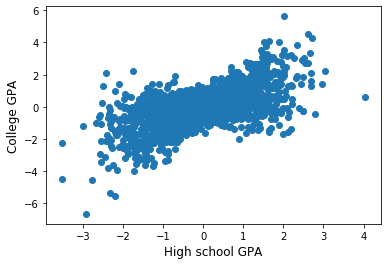

In [66]:
plt.scatter(df.high_school_GPA, df.college_GPA)
plt.xlabel("High school GPA", fontsize=12)
plt.ylabel("College GPA", fontsize=12)
plt.show()

<br>
We want to check there is random assignment of roommates. 

> **Ex. 12.1.4:** Plot high school GPA vs roommate's high school GPA. Comment on the output. Run a regresion of high school GPA on roommate's high school GPA to formally check random assignment.
>
>> *Hint*: To run regressions in python, you can use the `statsmodels` package. Look up it's documentation and use the `.formula` api to estimate your model. To see a summary of a fitted model you can call `.summary()` on the object. 
>
>> *Hint:* Under random assignment we would expect there to be no relation between the high school GPA's of roommates. Why is this? 

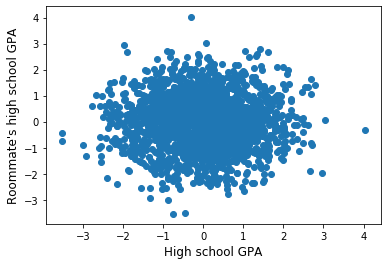

In [67]:
plt.scatter(df.high_school_GPA, df.high_school_GPA_y)
plt.xlabel("High school GPA", fontsize=12)
plt.ylabel("Roommate's high school GPA", fontsize=12)
plt.show()

In [73]:
reg = ols(formula='high_school_GPA ~ high_school_GPA_y', data=df)
results = reg.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        high_school_GPA   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.07263
Date:                Wed, 20 May 2020   Prob (F-statistic):              0.788
Time:                        13:21:54   Log-Likelihood:                -2883.6
No. Observations:                2000   AIC:                             5771.
Df Residuals:                    1998   BIC:                             5782.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0284      0.02

<br>
<br>

## Roommate effect

Having checked the data we move on to analyzing peer effects. We begin with analyzing **exogenous** peer effects. I.e. peer effects that are related to the ex ante characteristics of the roommate.

> **Ex. 12.1.5:** Plot own GPA in college vs. roommate GPA in high school. Comment on the output. Test whether there is an impact using a regresion of college school GPA on high school GPA for the person itself and its roommate.

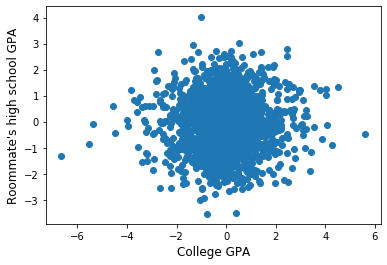

In [74]:
plt.scatter(df.college_GPA, df.high_school_GPA_y)
plt.xlabel("College GPA", fontsize=12)
plt.ylabel("Roommate's high school GPA", fontsize=12)
plt.show()

In [75]:
reg = ols(formula='college_GPA ~ high_school_GPA + high_school_GPA_y', data=df) 
results = reg.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            college_GPA   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     671.3
Date:                Wed, 20 May 2020   Prob (F-statistic):          1.03e-223
Time:                        13:28:06   Log-Likelihood:                -2586.0
No. Observations:                2000   AIC:                             5178.
Df Residuals:                    1997   BIC:                             5195.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0226      0.02

**The person's own high school GPA is strongly significant (not surprising) and the roommate's high school GPA would be significant on a 10% significance level**

We now move on to analyze **endogenous** peer effects.

> **Ex. 12.1.6:** Test whether there is an association between own college GPA and roommates. Do this by running a regresion of college school GPA on high school GPA for the person itself and its roommate. Comment on the output.

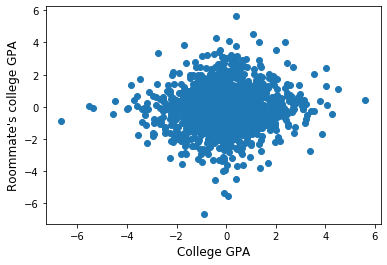

In [78]:
plt.scatter(df.college_GPA, df.college_GPA_y)
plt.xlabel("College GPA", fontsize=12)
plt.ylabel("Roommate's college GPA", fontsize=12)
plt.show()

In [77]:
reg = ols(formula='college_GPA ~ high_school_GPA + high_school_GPA_y + college_GPA_y', data=df)
results = reg.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            college_GPA   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     453.7
Date:                Wed, 20 May 2020   Prob (F-statistic):          1.02e-224
Time:                        13:33:08   Log-Likelihood:                -2580.3
No. Observations:                2000   AIC:                             5169.
Df Residuals:                    1996   BIC:                             5191.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0209      0.02

<br>
<br>

# 12.2 Peer effects in Danish classrooms

Read the [report by Kraka on peer effects in Danish schools](http://kraka.dk/sites/default/files/public/baggrundsnotat_klassekammerateffekter_0.pdf) from 2019. If you do not speak Danish talk to your group about the content.
> **Ex. 12.2.1:** Explain the identification strategy in words.

They assume random variation in composition of students in a given school across years. They argue, that the selection bias is dealt with due to this randomness in the peers across years

> **Ex. 12.2.2:** Are there any shortcomings of the identification strategy? What does the seminal paper [Hoxby (2000)](https://www.nber.org/papers/w78612.pdf) test for?

There are three major identification issues when estimation the causal effect of peer effects. Firstly, there exists a social multiplier: if an individual's abilities are effected by another peers' abilities, then peers' abilities are also effected by the individual's abilities. This could lead to an upward bias of peer effects. Secondly, there is a self-selection bias as students self-select into schools that are observables. This also leads to an upward bias. Thirdly, it's difficult to distinguish the effect of peers' abilities and peers' socioeconomic background because peers' abilities are also influenced by their socioeconomic background. Thus, when estimating peer effects one will have an omnibus measure of peers abilities and socioeconomic background.

> **Ex. 12.2.3:** Try to come up with identification strategies for identifying peer effects in the context of Danish class rooms.

A possible design is to use the randomization of class composition of students which could be due to school district laws. Another design, is to exploit the effect of an intake of student(s) in classes. Example here are from students being evacuated by hurricane Katrina and thus entering new schools. They find postive peer effects for especially low-ability students. A possible design is to use the natural randomization of class intake in Danish primary schools. In schools in more rural areas of Denmark, the schools only have until 6th grade (it is mandatory to graduate 9th grade) and these student will have to enroll in a another, larger school which is often further away from home and why this school was not chosen in the first place. These larger schools will often create a new track when students from rural areas enroll. This often happens in the 6th grade. A difference-in-differences approach could be applied to estimate the effect of new students being enrolled. There would have to controlled for other factors of importance such as the class size, teachers qualifications and school resources in order to isolate the effect of the peers.